<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

1. Introduction to LDA for Dimensionality Reduction

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
standardized = scaler.fit_transform(x)

In [ ]:
lda = LDA(n_components=2)
x_lda = lda.fit_transform(standardized, y)

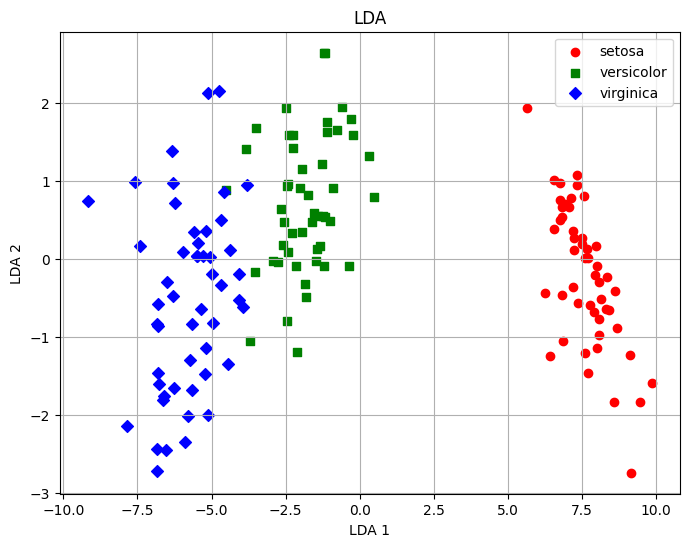

In [ ]:
plt.figure(figsize =(8,6))
for class_value, marker, color in zip([0,1,2], ['o', 's', 'D'], ['r', 'g', 'b']):
  plt.scatter(x_lda[y == class_value, 0], x_lda[y == class_value, 1], label = iris.target_names[class_value], marker = marker, color = color)

plt.title('LDA')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

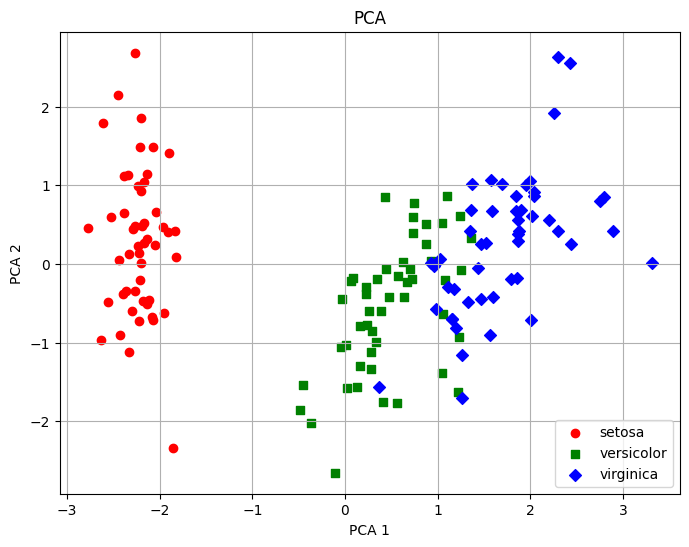

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(standardized, y)

plt.figure(figsize =(8,6))
for class_value, marker, color in zip([0,1,2], ['o', 's', 'D'], ['r', 'g', 'b']):
  plt.scatter(x_pca[y == class_value, 0], x_pca[y == class_value, 1], label = iris.target_names[class_value], marker = marker, color = color)

plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

2. LDA for Classification

In [ ]:
wine = load_wine()
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lda = LDA()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)

In [ ]:
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average = 'weighted')
recall_lda = recall_score(y_test, y_pred_lda, average = 'weighted')
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
classification_report_lda = classification_report(y_test, y_pred_lda)

In [ ]:
print('LDA')
print('Accuracy:', accuracy_lda)
print('Precision:', precision_lda)
print('Recall:', recall_lda)
print('Confusion Matrix:\n', confusion_matrix_lda)
print('Classification Report:\n', classification_report_lda)

LDA
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
reg = LogisticRegression(max_iter = 1000)
reg.fit(x_train, y_train)
y_pred_reg = reg.predict(x_test)

In [ ]:
accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg, average='weighted')
recall_reg = recall_score(y_test, y_pred_reg, average='weighted')
confusion_matrix_reg = confusion_matrix(y_test, y_pred_reg)
classification_report_reg = classification_report(y_test, y_pred_reg)

In [ ]:
print('Logistic Regression')
print('Accuracy:', accuracy_reg)
print('Precision:', precision_reg)
print('Recall:', recall_reg)
print('Confusion Matrix:\n', confusion_matrix_reg)
print('Classification Report:\n', classification_report_reg)

Logistic Regression
Accuracy: 0.9814814814814815
Precision: 0.982716049382716
Recall: 0.9814814814814815
Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



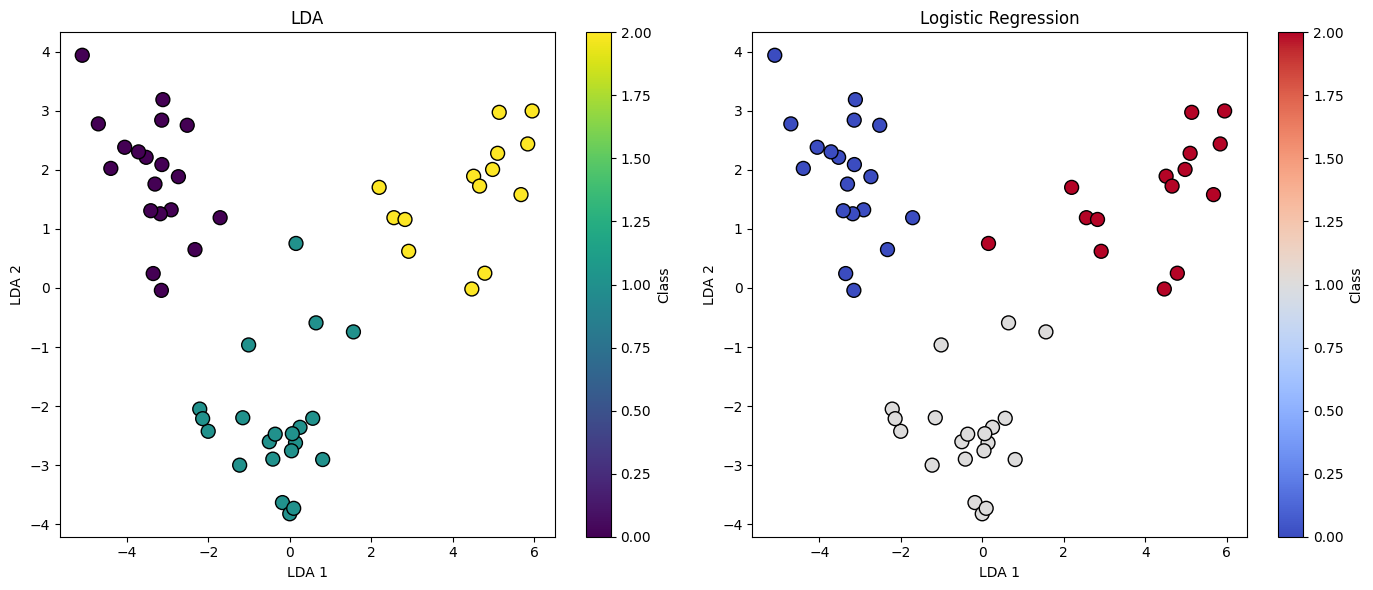

In [ ]:
lda_2d = LDA(n_components=2)
X_train_lda_2d = lda_2d.fit_transform(x_train, y_train)
X_test_lda_2d = lda_2d.transform(x_test)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(X_test_lda_2d[:, 0], X_test_lda_2d[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=100)
plt.title('LDA')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar(label='Class')

plt.subplot(1,2,2)
plt.scatter(X_test_lda_2d[:, 0], X_test_lda_2d[:, 1], c=y_pred_reg, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Logistic Regression')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar(label='Class')

plt.tight_layout()
plt.show()